In [26]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
#time=input() 
#time.sleep(1)
#A=np.array([[1,0],[0,1]])
#B=np.array([[2,1],[5,6]])
#np.dot(A,B)
np.random.normal(0, 2, 2) #z random values bte x,y
np.array([1,0,0]).reshape(1,3)
np.eye(3) #identity 
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [28]:
#state vector [x,u]
time=1
S=np.array([1,4])



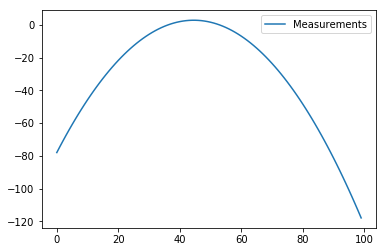

In [30]:
plotX=[]
plotY=[]
x = np.linspace(-10, 10, 100)
measurements = - (x**2 + 2*x - 2)  #+ np.random.normal(0, 2, 100)
plt.plot(range(len(measurements)), measurements, label = 'Measurements')
plt.legend()
plt.show()

In [33]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

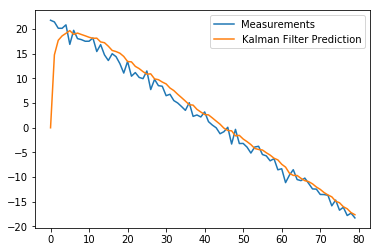

[ 2.17871384e+01  2.14455578e+01  2.01632946e+01  2.01546114e+01
  2.08536961e+01  1.68997007e+01  1.97451574e+01  1.80642181e+01
  1.78618829e+01  1.75294782e+01  1.75368293e+01  1.81934687e+01
  1.54505081e+01  1.68500978e+01  1.47718896e+01  1.36302895e+01
  1.50029213e+01  1.44114389e+01  1.29943708e+01  1.10867168e+01
  1.34395240e+01  1.04488404e+01  1.11836317e+01  1.02033606e+01
  9.95228180e+00  1.15130256e+01  7.74309054e+00  9.80788849e+00
  8.53307049e+00  8.41941103e+00  6.50253879e+00  6.78769248e+00
  5.50904908e+00  5.02503692e+00  4.30466221e+00  3.53133133e+00
  5.07638524e+00  2.31188455e+00  2.59535670e+00  2.18998190e+00
  3.21319274e+00  1.23810452e+00  5.49224048e-01 -6.41785137e-03
 -1.20902893e+00 -7.93474211e-01  1.00161323e-01 -3.29256032e+00
 -3.21160819e-01 -3.19078563e+00 -3.17246016e+00 -3.91933709e+00
 -5.12101385e+00 -3.89529190e+00 -3.75007650e+00 -5.41977911e+00
 -5.69456145e+00 -6.69372777e+00 -6.26608344e+00 -8.51565627e+00
 -8.30099172e+00 -1.11113

In [82]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u) #stateVector
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q #covMat 
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

    def example():
        dt = 1.0/60
        F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
        H = np.array([1, 0, 0]).reshape(1, 3)
        Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
        R = np.array([0.5]).reshape(1, 1)

        x = np.linspace(-10, 10, 80)
        measurements = - (2*x - 2)  + np.random.normal(0, 1, 80)

        kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
        predictions = []

        for z in measurements:
            predictions.append(np.dot(H,  kf.predict())[0])
            kf.update(z)

        import matplotlib.pyplot as plt
        plt.plot(range(len(measurements)), measurements, label = 'Measurements')
        plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
        plt.legend()
        plt.show()
        print(measurements)
        print(predictions)
    

    if __name__ == '__main__':
        example()




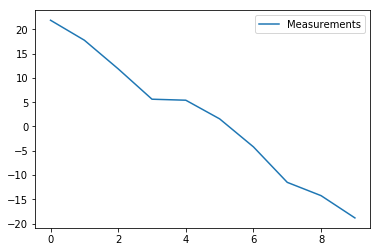

In [43]:
x = np.linspace(-10, 10, 10)
measurements = - (2*x - 2)  + np.random.normal(0, 2, 10)
plt.plot(range(len(measurements)), measurements, label = 'Measurements')
plt.legend()
plt.show()

In [77]:
S=[[2,5],[3,2]]
np.dot(S,np.linalg.inv(S))

array([[1.00000000e+00, 8.32667268e-17],
       [0.00000000e+00, 1.00000000e+00]])

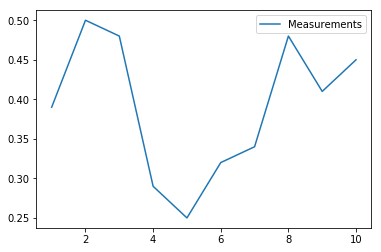

In [135]:
#KF 1d example
value=[0.39,0.5,0.48,0.29,0.25,0.32,0.34,0.48,0.41,0.45]
plt.plot(range(1,11), value, label = 'Measurements')
plt.legend()
plt.show()

In [136]:
#-----bulid model-----#
'''
xk = A.xk-1 + B.uk + wk-1
zk = H.xk + vk
'''
kf=[]
x0=0
P0=1
A=B=1
Q=0.02
R=0.1

In [137]:
for i in value:
    zk=i
    #-----time-update(prediction)-----#
    '''
    xk = A.xk-1 + B.uk
    Pk = A.Pk-1.At + Q
    '''
    xk=x0
    Pk=P0+Q
    #-----measurement-update(correction)-----#
    '''
    Kk = (Pk.Ht) / (H.Pk.Ht + R)
    xk = xk + Kk(zk - K.xk)
    Pk = (1 - Kk.H)Pk
    '''
    Kk=Pk/(Pk+R)
    xk=xk+Kk*(zk-xk)
    Pk=(1-Kk)*Pk
    #-----append estimate----#
    kf.append(xk)
    x0=xk
    P0=Pk
print(kf)    

[0.35517857142857145, 0.4313874788494078, 0.4518388551264458, 0.3898572672730791, 0.33835043448227375, 0.3317009831684584, 0.33468815103984745, 0.38684793822665486, 0.39514894534452144, 0.4148061949160811]


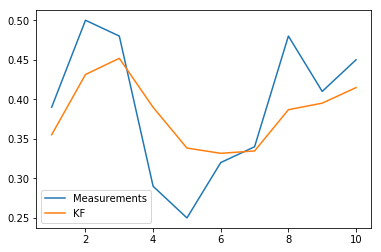

In [138]:
plt.plot(range(1,11), value, label = 'Measurements')
plt.plot(range(1,11), kf, label = 'KF')

plt.legend()
plt.show()

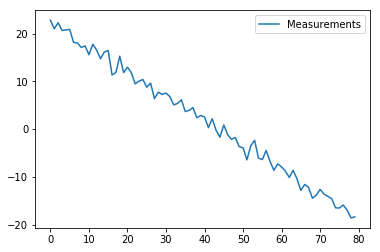

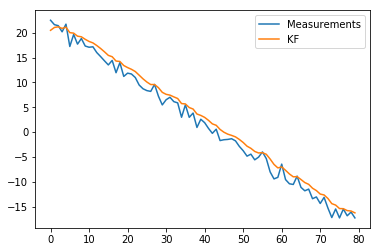

In [129]:
#Linear
x = np.linspace(-10, 10, 80)
value=-(2*x-2)+np.random.normal(0, 1, 80)
plt.plot(range(0,80), v, label = 'Measurements')
plt.legend()
plt.show()
#-----bulid model-----#
'''
xk = A.xk-1 + B.uk + wk-1
zk = H.xk + vk
'''
kf=[]
x0=0
P0=1
A=B=1
Q=0.01
R=0.1
for i in value:
    zk=i
    #-----time-update(prediction)-----#
    '''
    xk = A.xk-1 + B.uk
    Pk = A.Pk-1.At + Q
    '''
    xk=x0
    Pk=P0+Q
    #-----measurement-update(correction)-----#
    '''
    Kk = (Pk.Ht) / (H.Pk.Ht + R)
    xk = xk + Kk(zk - K.xk)
    Pk = (1 - Kk.H)Pk
    '''
    Kk=Pk/(Pk+R)
    xk=xk+Kk*(zk-xk)
    Pk=(1-Kk)*Pk
    #-----append estimate----#
    kf.append(xk)
    x0=xk
    P0=Pk
plt.plot(range(0,80), value, label = 'Measurements')
plt.plot(range(0,80), kf, label = 'KF')
plt.legend()
plt.show()

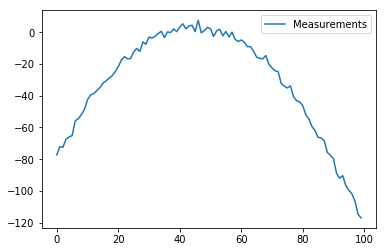

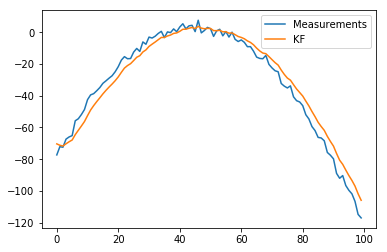

In [134]:
#Quadratic
x = np.linspace(-10, 10, 100)
value=-(x**2+2*x-2)+np.random.normal(0, 2, 100)
plt.plot(range(0,100), value, label = 'Measurements')
plt.legend()
plt.show()
#-----bulid model-----#
'''
xk = A.xk-1 + B.uk + wk-1
zk = H.xk + vk
'''
kf=[]
x0=0
P0=1
A=B=1
Q=0.01
R=0.1
for i in value:
    zk=i
    #-----time-update(prediction)-----#
    '''
    xk = A.xk-1 + B.uk
    Pk = A.Pk-1.At + Q
    '''
    xk=x0
    Pk=P0+Q
    #-----measurement-update(correction)-----#
    '''
    Kk = (Pk.Ht) / (H.Pk.Ht + R)
    xk = xk + Kk(zk - K.xk)
    Pk = (1 - Kk.H)Pk
    '''
    Kk=Pk/(Pk+R)
    xk=xk+Kk*(zk-xk)
    Pk=(1-Kk)*Pk
    #-----append estimate----#
    kf.append(xk)
    x0=xk
    P0=Pk
plt.plot(range(0,100), value, label = 'Measurements')
plt.plot(range(0,100), kf, label = 'KF')
plt.legend()
plt.show()